In [1]:
import pandas as pd

In [7]:
medicine_sale = pd.read_csv(u'서울특별시 동물용 의약품 도매업체 정보.csv',encoding='utf-8')
medicine_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 20 columns):
번호           43 non-null int64
사업장명         43 non-null object
소재지전체주소      42 non-null object
도로명전체주소      38 non-null object
인허가일자        43 non-null int64
영업상태명        43 non-null object
폐업일자         0 non-null float64
휴업시작일자       0 non-null float64
휴업종료일자       0 non-null float64
재개업일자        0 non-null float64
소재지면적        36 non-null float64
소재지우편번호      0 non-null float64
총종업원수        0 non-null float64
축산물가공업구분명    0 non-null float64
축산업무구분명      43 non-null object
전화번호         39 non-null object
위치정보(X)      43 non-null float64
위치정보(Y)      43 non-null float64
인허가번호        43 non-null int64
상세영업상태명      43 non-null object
dtypes: float64(10), int64(3), object(7)
memory usage: 6.8+ KB


In [35]:
medicine_sale.columns

Index([u'번호', u'사업장명', u'소재지전체주소', u'도로명전체주소', u'인허가일자', u'영업상태명', u'폐업일자',
       u'휴업시작일자', u'휴업종료일자', u'재개업일자', u'소재지면적', u'소재지우편번호', u'총종업원수',
       u'축산물가공업구분명', u'축산업무구분명', u'전화번호', u'위치정보(X)', u'위치정보(Y)', u'인허가번호',
       u'상세영업상태명'],
      dtype='object')

In [50]:
guname=[]
num = int(medicine_sale[u'도로명전체주소'].shape[0])
count=0
for name in range (1,num):
        if(count%10==0):print(count)
        count+=1
        try:
            if (medicine_sale.iloc[name][u'도로명전체주소']==None)==True:
                gu= medicine_sale.iloc[name][u'도로명전체주소'].split(' ')[1]
                print gu
                guname.append(gu)
            else:
                gu= medicine_sale.iloc[name][u'소재지전체주소'].split(' ')[1]
                print gu
                guname.append(gu)
        except : 
            guname.append(None)
print("ok")

0
성동구
광진구
동대문구
동대문구
중랑구
중랑구
성북구
도봉구
노원구
노원구
10
노원구
은평구
은평구
서대문구
마포구
강서구
구로구
영등포구
영등포구
20
영등포구
영등포구
영등포구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
30
서초구
영등포구
서초구
서초구
안양시
강남구
강남구
송파구
송파구
송파구
40
강동구
강동구
ok


In [53]:
gn=pd.DataFrame({'gu':guname})
medicine_sale = medicine_sale.join(gn,how='outer')

In [54]:
medicine_sale=medicine_sale[[u'사업장명',u'소재지전체주소',u'도로명전체주소',u'영업상태명',u'gu']]
medicine_sale=medicine_sale.loc[(medicine_sale[u'영업상태명'].str.contains(u'운영중'))]

In [55]:
medicine_sale.to_csv(u"동물용의약품도매업_정제.csv",encoding='utf-8') 

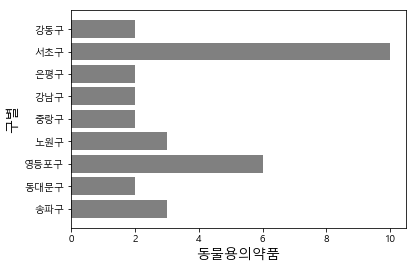

In [56]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
med=list(medicine_sale['gu'].dropna())
d=dict()
for sent in med:
    for w in sent.split():
        if w not in d:
            d[w]=1
        else:
            d[w]=d[w]+1

d1 = dict()
for key, value in d.iteritems():
    if value>1:
        d1[key]=value
plt.xlabel(u'동물용의약품',fontsize=14)
plt.ylabel(u'구별',fontsize=14)
plt.barh(range(len(d1.values())), d1.values(), color = 'gray')
plt.yticks(range(len(d1.values())),d1.keys())
plt.show()

In [48]:
medicine_sale

,사업장명,소재지전체주소,도로명전체주소,영업상태명,gu
0,한국엠에스디동물약품(주),서울특별시 중구 남대문로5가 541번지,서울특별시 중구 한강대로 416 22층 (남대문로5가 서울스퀘어),운영중,None
1,주식회사성보애니멀헬스,서울특별시 성동구 성수동2가 280-15번지 802호,서울특별시 성동구 광나루로8길 10 802호 (성수동2가 에이스성수타워1),운영중,None
2,주식회사 카브,서울특별시 광진구 화양동 1번지,서울특별시 광진구 능동로 120 미래에너지관동 203204호 (화양동 건국대학교),운영중,None
3,(주)팜스홀,서울특별시 동대문구 용두동 129-167번지 2층,NaN,운영중,None
4,(주)카카오팜,서울특별시 동대문구 장안동 430-2번지,서울특별시 동대문구 장한로 47 4층 (장안동 우측),운영중,None
5,일승물산(주),서울특별시 중랑구 묵동 48-22번지,서울특별시 중랑구 공릉로18길 68 (묵동),운영중,None
6,(주)에이팜,서울특별시 중랑구 면목동 191-87번지 성경빌딩,서울특별시 중랑구 봉우재로1길 3 2층 (면목동),운영중,None
7,서울수의약품(주),서울특별시 성북구 안암동5가 110-126번지,서울특별시 성북구 안암로 47-1 (안암동5가),운영중,None
8,대호상사,서울특별시 도봉구 창동 667-5번지 101호,서울특별시 도봉구 노해로62길 80 101호 (창동),운영중,None
9,대암축산,서울특별시 노원구 공릉동,서울특별시 노원구 동일로190길 41 4호 (공릉동 진영빌딩),운영중,None


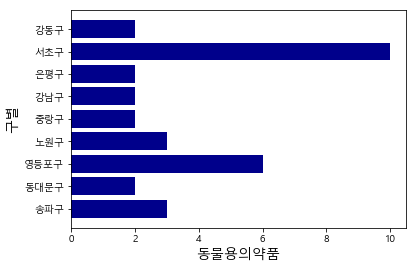

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

def medicine_clean():
    medicine_sale = pd.read_csv(u'서울특별시 동물용 의약품 도매업체 정보.csv',encoding='utf-8')
    guname=[]
    size = int(medicine_sale[u'도로명전체주소'].shape[0])
    for name in range (0,size):
            try:
                if (medicine_sale.iloc[name][u'도로명전체주소']==None)==True:
                    gu= medicine_sale.iloc[name][u'도로명전체주소'].split(' ')[1]
                    guname.append(gu)
                else:
                    gu= medicine_sale.iloc[name][u'소재지전체주소'].split(' ')[1]
                    guname.append(gu)
            except : 
                guname.append(None)
    gn=pd.DataFrame({'gu':guname})
    medicine_sale = medicine_sale.join(gn,how='outer')
    medicine_sale=medicine_sale.loc[(medicine_sale[u'영업상태명'].str.contains(u'운영중'))][[u'사업장명',u'소재지전체주소',u'도로명전체주소',u'영업상태명',u'gu']]
    med=list(medicine_sale['gu'].dropna())
    return med

def fre_medicine(list_medicine):
    d=dict()
    for sent in list_medicine:
        for w in sent.split():
            if w not in d:
                d[w]=1
            else:
                d[w]=d[w]+1
    d_value = d.values()
    d_value.sort(reverse=True)
    num = d_value[10]
    d1 = dict()
    for key, value in d.iteritems():
        if value>1:
            d1[key]=value
    plt.xlabel(u'동물용의약품',fontsize=14)
    plt.ylabel(u'구별',fontsize=14)
    plt.barh(range(len(d1.values())), d1.values(), color = 'darkblue')
    plt.yticks(range(len(d1.values())),d1.keys())
    plt.savefig("medicine_gu.png")
    plt.show()
    
def main():
    fre_medicine(medicine_clean())
if __name__=="__main__":
    main()